# Практическая работа

# Задача

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.

Для решения этой задачи загрузите файлы из базы в Postgres.
Эта БД хранит информацию о клиентах банка и их персональные данные, такие как пол, количество детей и другие.

Описание таблиц с данными представлено ниже.

**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности.


**D_agreement**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

*Ниже* представлен минимальный список колонок, которые должны находиться в итоговом датасете после склейки и агрегации данных. По своему усмотрению вы можете добавить дополнительные к этим колонки.

    - AGREEMENT_RK — уникальный идентификатор объекта в выборке;
    - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
    - AGE — возраст клиента;
    - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
    - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
    - GENDER — пол клиента (1 — мужчина, 0 — женщина);
    - CHILD_TOTAL — количество детей клиента;
    - DEPENDANTS — количество иждивенцев клиента;
    - PERSONAL_INCOME — личный доход клиента (в рублях);
    - LOAN_NUM_TOTAL — количество ссуд клиента;
    - LOAN_NUM_CLOSED — количество погашенных ссуд клиента.

Будьте внимательны при сборке датасета: это реальные банковские данные, в которых могут наблюдаться дубли, некорректно заполненные значения или значения, противоречащие друг другу. Для получения качественной модели необходимо предварительно очистить датасет от такой информации.

## Задание 1

Соберите всю информацию о клиентах в одну таблицу, где одна строчка соответствует полной информации об одном клиенте.

In [2]:
import pandas as pd

In [3]:
PATH = r'C:\Users\nikel\OneDrive\Рабочий стол\data\\'

D_clients = pd.read_csv(PATH + 'D_clients.csv', sep=',')
D_job = pd.read_csv(PATH + 'D_job.csv')
D_salary = pd.read_csv(PATH + 'D_salary.csv')
D_last_credit = pd.read_csv(PATH + 'D_last_credit.csv')
D_loan = pd.read_csv(PATH + 'D_loan.csv')
D_close_loan = pd.read_csv(PATH + 'D_close_loan.csv')
D_target = pd.read_csv(PATH + 'D_target.csv')

In [4]:
D_clients.describe()

,ID,AGE,GENDER,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,FL_PRESENCE_FL,OWN_AUTO
count,1.600000e+04,16000.000000,16000.00000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,1.068124e+08,40.394750,0.65325,1.097562,0.644437,0.909375,0.134625,0.310188,0.116562
std,4.618946e+03,11.600365,0.47595,0.995731,0.811975,0.287084,0.341333,0.462585,0.321298
min,1.068044e+08,21.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.068084e+08,30.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.068124e+08,39.000000,1.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.068164e+08,50.000000,1.00000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.068204e+08,67.000000,1.00000,10.000000,7.000000,1.000000,1.000000,1.000000,2.000000


In [5]:
D_job.describe()

,WORK_TIME,ID_CLIENT
count,1.385500e+04,1.522300e+04
mean,2.922120e+02,1.068120e+08
std,2.436483e+04,4.394646e+03
min,1.000000e+00,1.068044e+08
25%,2.400000e+01,1.068082e+08
50%,4.800000e+01,1.068120e+08
75%,1.100000e+02,1.068158e+08
max,2.867959e+06,1.068196e+08


In [6]:
D_salary.describe()

,PERSONAL_INCOME,ID_CLIENT
count,15523.000000,1.552300e+04
mean,13848.041638,1.068120e+08
std,8998.618992,4.395857e+03
min,24.000000,1.068044e+08
25%,8000.000000,1.068082e+08
50%,12000.000000,1.068120e+08
75%,17000.000000,1.068158e+08
max,250000.000000,1.068196e+08


In [7]:
D_last_credit.describe()

,CREDIT,TERM,FST_PAYMENT,ID_CLIENT
count,15223.000000,15223.000000,15223.000000,1.522300e+04
mean,14667.959345,8.101031,3398.562655,1.068120e+08
std,12147.873496,4.094090,5158.108934,4.394646e+03
min,2000.000000,3.000000,0.000000,1.068044e+08
25%,6500.000000,6.000000,1000.000000,1.068082e+08
50%,11550.000000,6.000000,2000.000000,1.068120e+08
75%,19170.000000,10.000000,4000.000000,1.068158e+08
max,119700.000000,36.000000,140000.000000,1.068196e+08


In [8]:
D_close_loan.describe()

,ID_LOAN,CLOSED_FL
count,2.112600e+04,21126.000000
mean,1.753801e+09,0.541797
std,6.098695e+03,0.498262
min,1.753791e+09,0.000000
25%,1.753796e+09,0.000000
50%,1.753801e+09,1.000000
75%,1.753807e+09,1.000000
max,1.753812e+09,1.000000


In [9]:
D_target.describe()

,AGREEMENT_RK,ID_CLIENT,TARGET
count,1.522300e+04,1.522300e+04,15223.000000
mean,6.540183e+07,1.068120e+08,0.119030
std,4.568181e+06,4.394646e+03,0.323835
min,5.991015e+07,1.068044e+08,0.000000
25%,6.192092e+07,1.068082e+08,0.000000
50%,6.437100e+07,1.068120e+08,0.000000
75%,6.708802e+07,1.068158e+08,0.000000
max,7.529224e+07,1.068196e+08,1.000000


В таблицах нет аномальных значений

Удалим явные дубликаты из таблиц

In [10]:
D_clients = D_clients.drop_duplicates()
D_job = D_job.drop_duplicates()
D_salary = D_salary.drop_duplicates()
D_last_credit = D_last_credit.drop_duplicates()
D_close_loan = D_close_loan.drop_duplicates()
D_target = D_target.drop_duplicates()
D_loan = D_loan.drop_duplicates()

In [11]:
D_target

,AGREEMENT_RK,ID_CLIENT,TARGET
0,59910150,106804370,0
1,59910230,106804371,0
2,59910525,106804372,0
3,59910803,106804373,0
4,59911781,106804374,0
...,...,...,...
15218,75291424,106819588,0
15219,75291888,106819589,0
15220,75291923,106819590,0
15221,75291960,106819591,0


In [12]:
df

NameError: name 'df' is not defined

Объединим таблицы в одну

In [13]:
df = D_clients.merge(D_job, left_on='ID', right_on='ID_CLIENT', how='left')
df = df.merge(D_salary, left_on='ID', right_on='ID_CLIENT', how='left')
df = df.merge(D_last_credit, left_on='ID', right_on='ID_CLIENT', how='left')

df = df.merge(D_target, left_on='ID', right_on='ID_CLIENT', how='inner')


num_total = D_loan.groupby('ID_CLIENT').agg('count')
df = df.merge(num_total, left_on='ID', right_on='ID_CLIENT', how='left')

D_loan = D_loan.merge(D_close_loan, on='ID_LOAN', how='left')
D_loan_group = D_loan.groupby(by='ID_CLIENT').agg('sum')

df = df.merge(D_loan_group, left_on='ID', right_on='ID_CLIENT', how='left')


C:\Users\nikel\AppData\Local\Temp\ipykernel_16880\467895592.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ID_CLIENT_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(D_target, left_on='ID', right_on='ID_CLIENT', how='inner')


Удалим ненужные столбцы

In [14]:
df = df.drop(['REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'FL_PRESENCE_FL',
         'OWN_AUTO', 'GEN_INDUSTRY', 'JOB_DIR', 'GEN_TITLE', 'WORK_TIME', 'ID_CLIENT_x', 'FAMILY_INCOME', 'ID_CLIENT_y', 
        'CREDIT', 'TERM', 'FST_PAYMENT', 'ID_CLIENT_x', 'ID_LOAN_y', 'EDUCATION', 'MARITAL_STATUS', 'ID'], axis=1)

In [15]:
df.columns

Index(['AGE', 'GENDER', 'CHILD_TOTAL', 'DEPENDANTS', 'SOCSTATUS_WORK_FL',
       'SOCSTATUS_PENS_FL', 'PERSONAL_INCOME', 'AGREEMENT_RK', 'TARGET',
       'ID_LOAN_x', 'CLOSED_FL'],
      dtype='object')

In [16]:
df = df.rename(columns={"ID_LOAN_x": "LOAN_NUM_TOTAL", "CLOSED_FL": "LOAN_NUM_CLOSED"})

Проверим на пропуски

In [17]:
df.isna().sum()

AGE                  0
GENDER               0
CHILD_TOTAL          0
DEPENDANTS           0
SOCSTATUS_WORK_FL    0
SOCSTATUS_PENS_FL    0
PERSONAL_INCOME      0
AGREEMENT_RK         0
TARGET               0
LOAN_NUM_TOTAL       0
LOAN_NUM_CLOSED      0
dtype: int64

In [18]:
df.to_csv(r'C:\Users\nikel\OneDrive\Рабочий стол\data\df.csv', index=False)

## Задание 2

При помощи инструмента Streamlit проведите разведочный анализ данных. В него может входить:

* построение графиков распределений признаков
* построение матрицы корреляций
* построение графиков зависимостей целевой переменной и признаков
* вычисление числовых характеристик распределения числовых столбцов (среднее, min, max, медиана и так далее)
* любые другие ваши идеи приветствуются!

[Пример Streamlit-приложения](https://rateyourflight.streamlit.app) с разведочным анализом, прогнозом модели и оценкой ее результатов.

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Распределение личного дохода

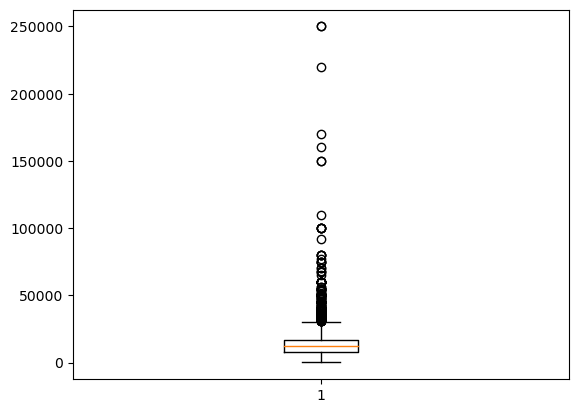

In [28]:
plt.boxplot(df['PERSONAL_INCOME'])
plt.show()

Распределение возраста

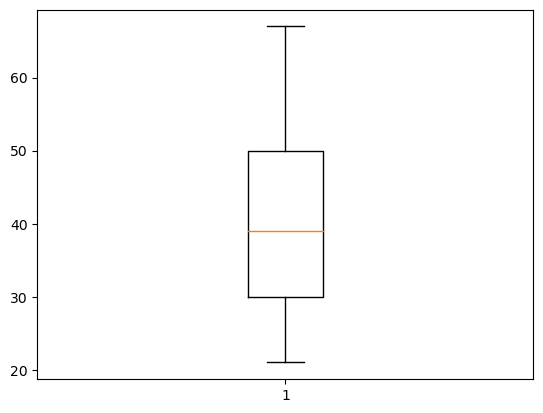

In [29]:
plt.boxplot(df['AGE'])
plt.show()

Матрица корреляций

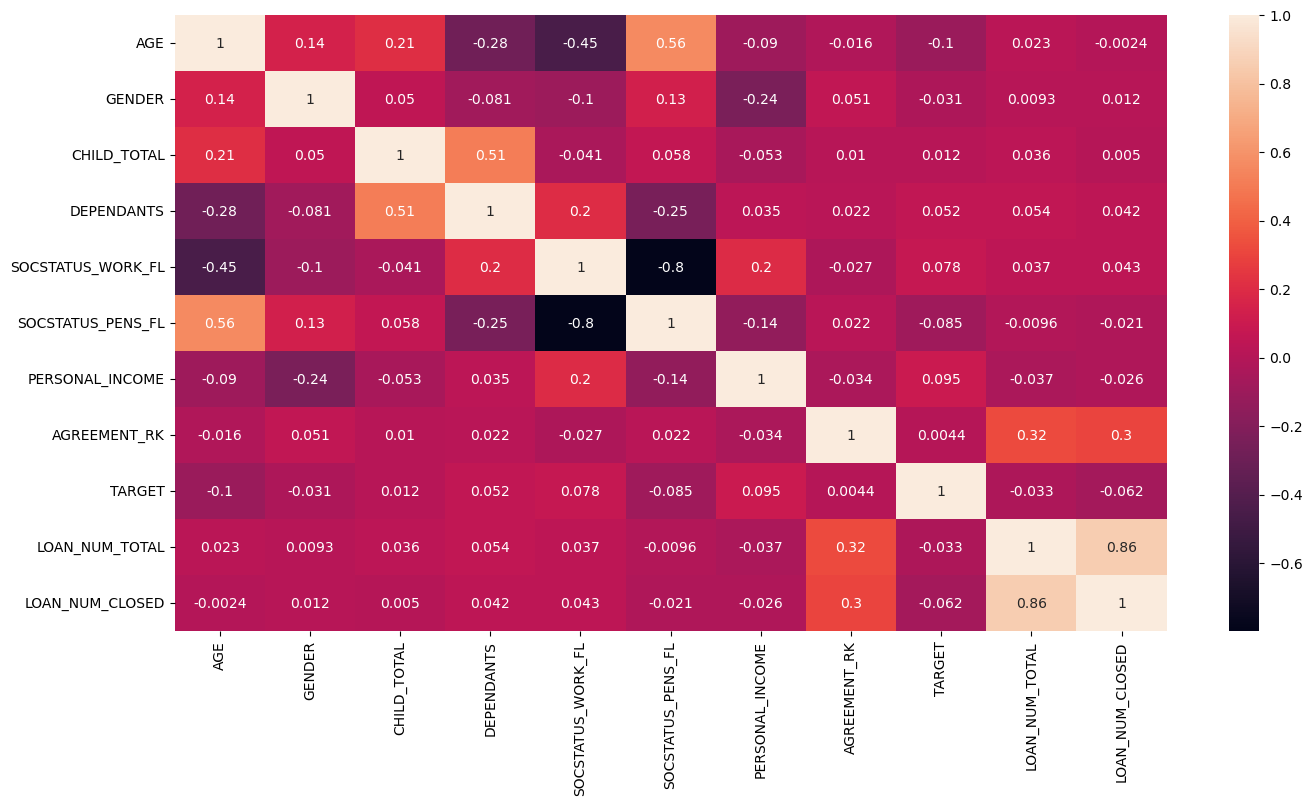

In [41]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

Зависимость целевой переменной от личного дохода

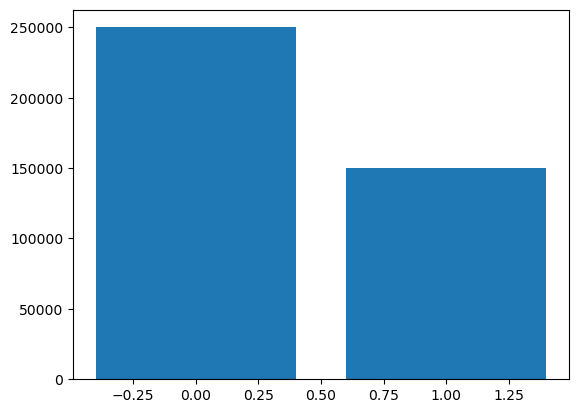

In [46]:
plt.bar(df['TARGET'], df['PERSONAL_INCOME'])
plt.show()

Зависимость целевой переменной от возраста

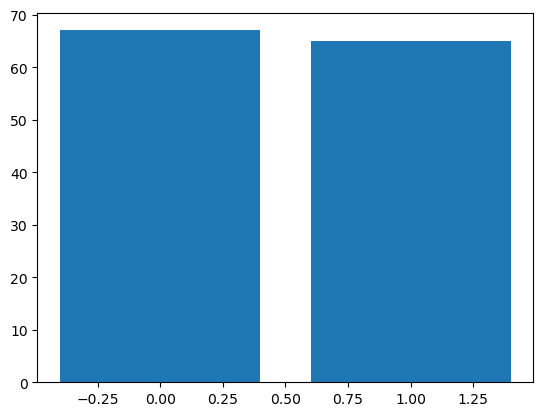

In [47]:
plt.bar(df['TARGET'], df['AGE'])
plt.show()

In [52]:
numbers = ['AGE', 'CHILD_TOTAL', 'DEPENDANTS', 'PERSONAL_INCOME', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED']
categorical = ['GENDER', 'DEPENDANTS', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL']

Характеристики числовых столбцов

In [54]:
df[numbers].describe()

,AGE,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
count,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000
mean,40.406096,1.099389,0.645208,13853.836323,1.387769,0.751889
std,11.601068,0.995411,0.812252,9015.467617,0.793566,0.988499
min,21.000000,0.000000,0.000000,24.000000,1.000000,0.000000
25%,30.000000,0.000000,0.000000,8000.000000,1.000000,0.000000
50%,39.000000,1.000000,0.000000,12000.000000,1.000000,0.000000
75%,50.000000,2.000000,1.000000,17000.000000,2.000000,1.000000
max,67.000000,10.000000,7.000000,250000.000000,11.000000,11.000000


Характеристики категориальных столбцов

In [58]:
df[categorical].astype('category').describe()

,GENDER,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL
count,15223,15223,15223,15223
unique,2,8,2,2
top,1,0,1,0
freq,9964,8226,13847,13176
